# Imports

In [1]:
from imports import *
from wrangle import wrangle_zillow

%matplotlib inline

In [2]:
df=wrangle_zillow()

Using cached csv


In [3]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130214 entries, 0 to 2130213
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   beds            2130214 non-null  float64
 1   baths           2130214 non-null  float64
 2   sqft            2130214 non-null  float64
 3   property_value  2130214 non-null  float64
 4   year            2130214 non-null  int64  
 5   taxes           2130214 non-null  float64
 6   fips            2130214 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 113.8 MB


# 1 - Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

In [4]:
scalings=['sqft','property_value','taxes','year']


In [5]:
df_mm = pd.DataFrame(df[scalings],columns=scalings)
df_ss = pd.DataFrame(df[scalings],columns=scalings)
df_rs = pd.DataFrame(df[scalings],columns=scalings)

In [6]:
scaler_mm = MinMaxScaler()
df_mm[scalings] = scaler_mm.fit_transform(df_mm[scalings])

scaler_ss = StandardScaler()
df_ss[scalings] = scaler_ss.fit_transform(df_ss[scalings])

scaler_rs = RobustScaler()
df_rs[scalings] = scaler_rs.fit_transform(df_rs[scalings])

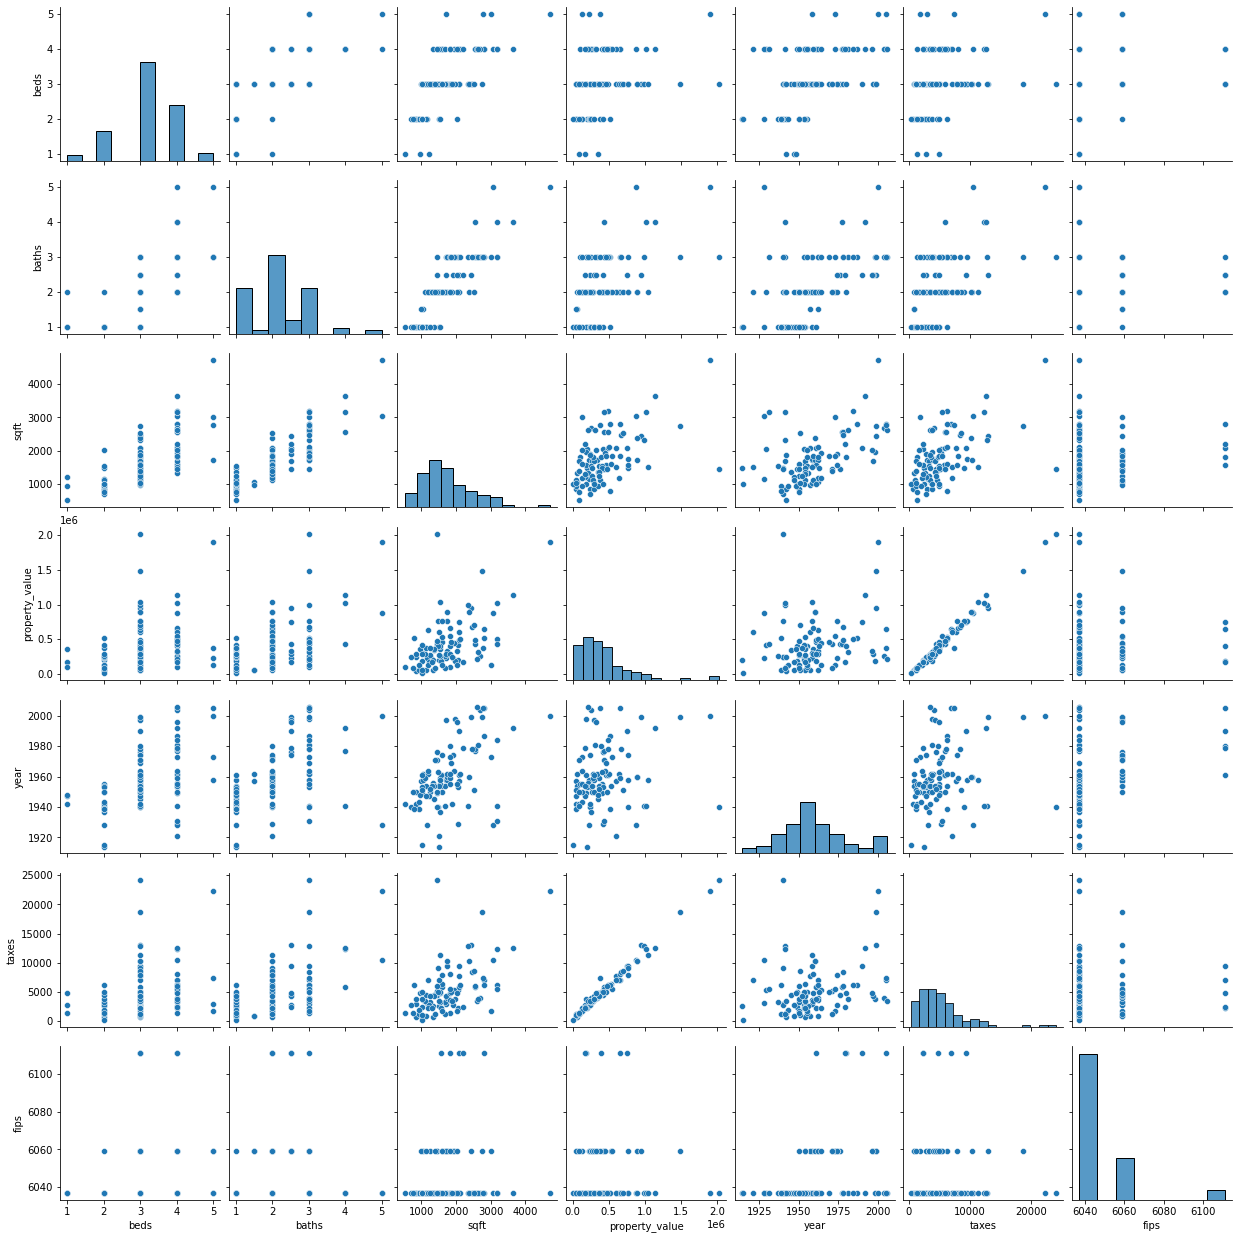

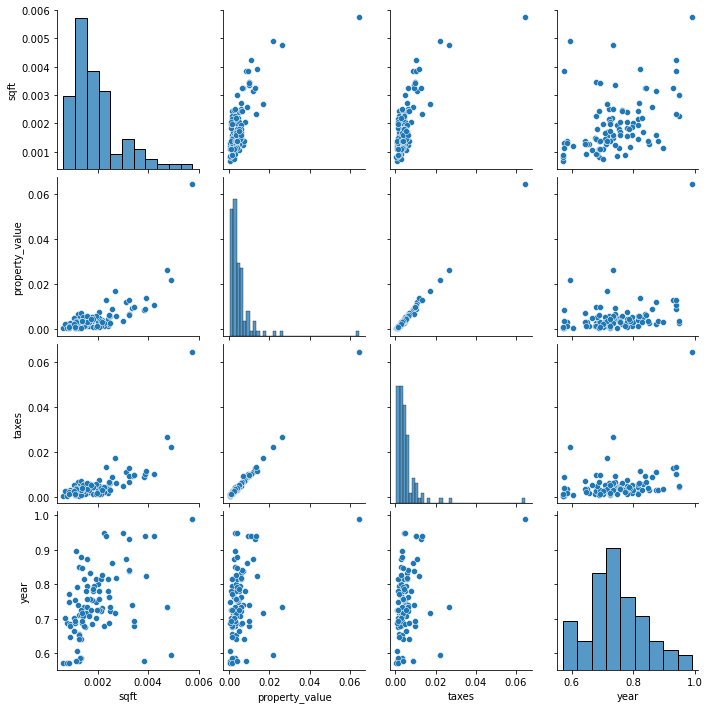

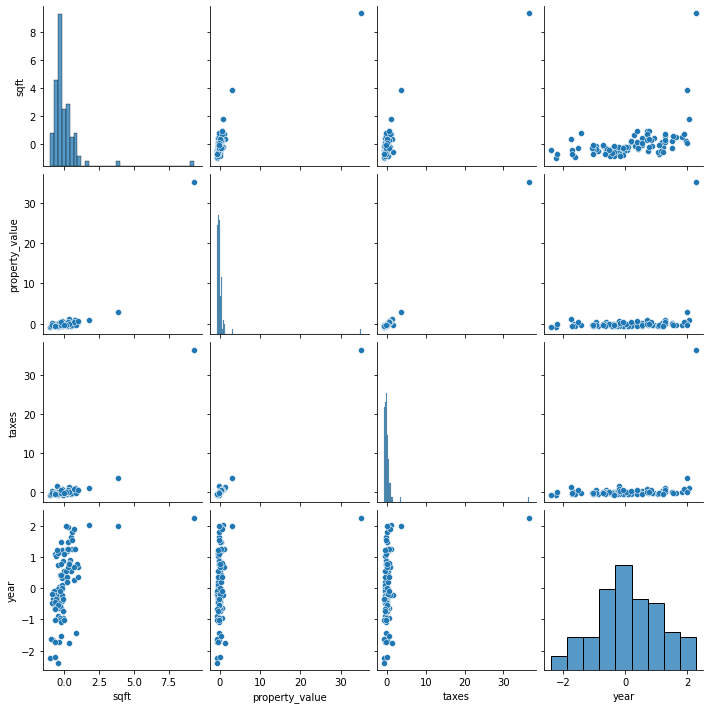

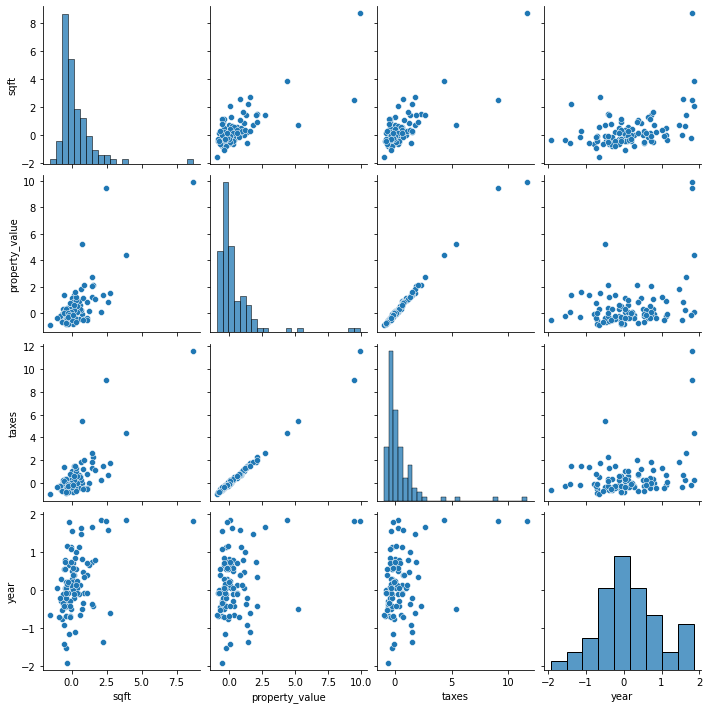

In [7]:
sns.pairplot(df.sample(10**2),diag_kind='hist', palette='icefire'),
sns.pairplot(df_mm.sample(10**2),diag_kind='hist', palette='icefire'),
sns.pairplot(df_ss.sample(10**2),diag_kind='hist', palette='icefire'),
sns.pairplot(df_rs.sample(10**2),diag_kind='hist', palette='icefire')

# 2 - Apply the `.inverse_transform` method to your scaled data. Is the resulting dataset the exact same as the original data?

- in theory, yes, in actual compute, no. 
- overflow conditions have been observed.

In [8]:
df_mm[scalings] = scaler_mm.inverse_transform(df_mm[scalings])

df_ss[scalings] = scaler_ss.inverse_transform(df_ss[scalings])

df_rs[scalings] = scaler_rs.inverse_transform(df_rs[scalings])

In [9]:
[print(f"{c}:\n{(df[c]==df_mm[c]).value_counts()}\n" )for c in scalings]

sqft:
True     2009816
False     120398
Name: sqft, dtype: int64

property_value:
True     1820335
False     309879
Name: property_value, dtype: int64

taxes:
True     2074058
False      56156
Name: taxes, dtype: int64

year:
True     1266394
False     863820
Name: year, dtype: int64



[None, None, None, None]

# 3 - Read the documentation for sklearn's `QuantileTransformer`. Use `normal` for the `output_distribution` and apply this scaler to your data. Visualize the result of your data scaling.

In [21]:
qt=QuantileTransformer(n_quantiles=10,random_state=123,output_distribution='normal')
df_qt = pd.DataFrame(df[scalings],columns=scalings)
df_qt[scalings]=qt.fit_transform(df_qt[scalings])


In [22]:
df_qt.head()

,sqft,property_value,taxes,year
0,1.234456,-0.129752,0.782329,1.674578
1,-0.021831,1.221172,1.221110,2.026290
2,0.527425,0.888960,0.923992,-1.322930
3,-0.812218,-2.506863,-2.502061,0.571145
4,-2.135684,-2.412303,-2.072663,0.607966


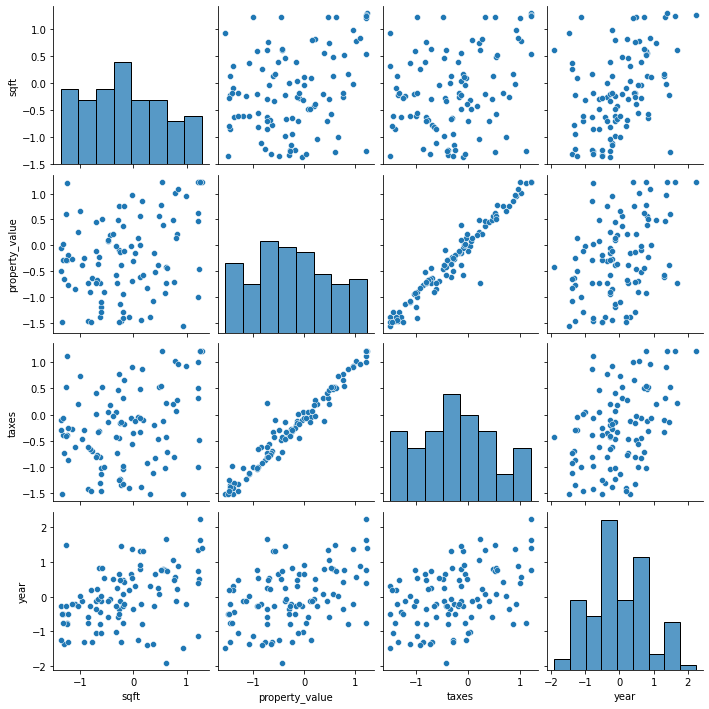

In [23]:
sns.pairplot(df_qt.sample(10**2),diag_kind='hist', palette='icefire')

# 4 - Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

- `diag_kind='normal'` shows the distribution of the variable.
- when ommited, the diagonal chart shows the count of the variable.

In [24]:
qt=QuantileTransformer(n_quantiles=10,random_state=123)
df_qt = pd.DataFrame(df[scalings],columns=scalings)
df_qt[scalings]=qt.fit_transform(df_qt[scalings])


In [25]:
df_qt.head()

,sqft,property_value,taxes,year
0,0.891483,0.448381,0.782989,0.952991
1,0.491291,0.888990,0.888978,0.978632
2,0.701051,0.812988,0.822255,0.092929
3,0.208333,0.006090,0.006174,0.716049
4,0.016353,0.007926,0.019102,0.728395


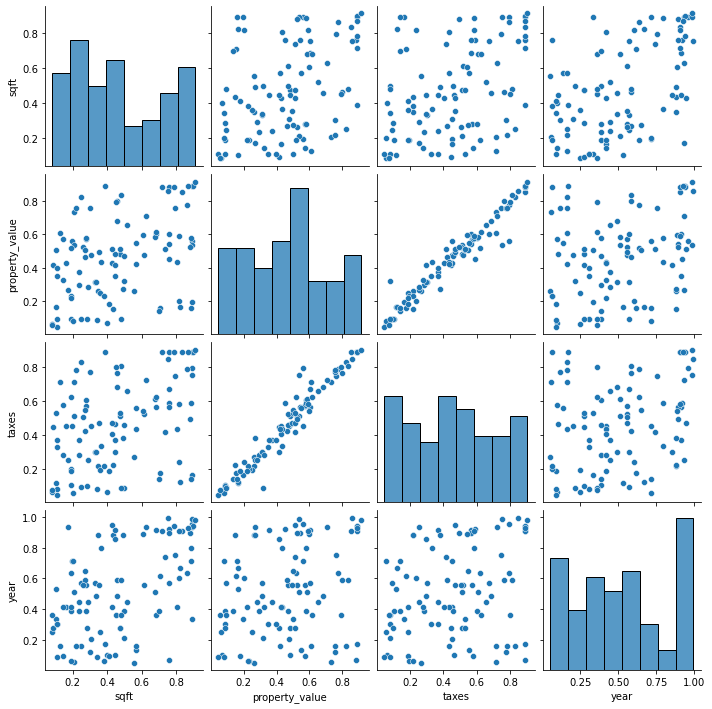

In [26]:
sns.pairplot(df_qt.sample(10**2),diag_kind='hist', palette='icefire')